In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
from datetime import timedelta
import firebase_admin
from firebase_admin import db
from firebase_admin import credentials
import pytz


def to_datetime(dates, zone="US/Eastern", tz_aware=True):
    """
    Standardizes the various types of string datetime formats
    """
    dt = []
    for i in dates:
        try:
            i_dt = datetime.strptime(i, '%Y%m%d_%H:%M:%S')
        except:
            print(i)
        if tz_aware:
            # tz = pytz.timezone('US/Eastern')
            tz = pytz.timezone('UTC')
            i_dt = tz.localize(i_dt)
            dt.append(i_dt.astimezone(pytz.timezone(zone)))
        else:
            dt.append(i_dt)
    return np.array(dt)  

### ONLY RUN ONCE! ###
#download data from firebase
try:
    firebase_admin.delete_app(app)
except:
    print('making new app')
cred = credentials.Certificate("../fb_key.json")
app = firebase_admin.initialize_app(cred, {'databaseURL': 'https://haucs-monitoring-default-rtdb.firebaseio.com'})

making new app


In [6]:
# data = db.reference('LH_Farm/').order_by_key().start_at("p").get()


In [7]:
data.keys()

odict_keys(['20240911_18:54:32', '20240911_19:14:39', '20240911_19:34:40', '20240911_19:54:56', '20240911_20:15:04', '20240911_20:35:04', '20240911_20:55:20', '20240911_21:15:28', '20240911_21:35:44', '20240911_21:56:00', '20240911_22:16:00', '20240911_22:36:16', '20240911_22:56:16', '20240911_23:16:24', '20240911_23:36:24', '20240911_23:56:24', '20240912_00:16:32', '20240912_00:36:32', '20240912_00:56:48', '20240912_01:16:56', '20240912_01:37:11', '20240912_01:57:27', '20240912_02:17:36', '20240912_02:37:51', '20240912_02:57:51', '20240912_03:18:07', '20240912_03:38:08', '20240912_03:58:24', '20240912_04:18:32', '20240912_04:38:48', '20240912_04:58:48', '20240912_05:18:56', '20240912_05:38:56', '20240912_05:59:12', '20240912_06:19:20', '20240912_06:39:36', '20240912_06:59:44', '20240912_07:19:50', '20240912_07:39:58', '20240912_08:00:08', '20240912_08:20:14', '20240912_08:40:23', '20240912_09:00:39', '20240912_09:20:46', '20240912_09:40:55', '20240912_10:01:05', '20240912_10:21:10', '

In [5]:
init_do = []
for i in data:
    if i[5:].isnumeric():
        for j in data[i]:
            entry = data[i][j]
            if entry['type'] == "truck":
                init_do.append(entry['init_do'])

init_do = np.array(init_do)

In [4]:
np.arange(19) * 10

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180])

In [31]:
init_do = init_do.astype('int')
init_do.min

0

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240]
[ 4 16 16 ... 15 15 15]
[  0  12   0  47  54  76 110 317 444 393 478 646 636 575 435 365 284 260
 118 114   0   0   0   0   4  92]
113.87124542124542 38.791677304793815


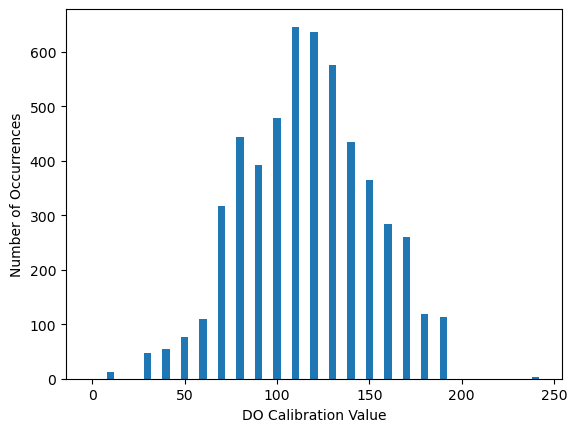

In [36]:
bins = np.arange(25) * 10
print(bins)
indices = np.digitize(init_do, bins)
print(indices)
x = np.bincount(indices)
print(x)
plt.bar(bins, x[:-1], width=4)
plt.xlabel("DO Calibration Value")
plt.ylabel("Number of Occurrences")
plt.savefig('calibration_occurences.png')

print(init_do.mean(), init_do.std())

In [6]:
dt_list = list(data.keys())
dt = to_datetime(dt_list)

init_do = data[dt_list[0]]['init_do']
init_p = data[dt_list[0]]['init_pressure']

t = np.array([np.mean(data[i]['temp']) for i in data])
do = np.array([np.mean(data[i]['do'])/init_do for i in data]) * 100
p = np.array([np.mean(data[i]['pressure']) - init_p for i in data]) * 0.010227
batt_v = np.array([data[i]['batt_v'] for i in data])

print(dt[-1], data[dt_list[-1]]['batt_v'])

pond_1


UnboundLocalError: cannot access local variable 'i_dt' where it is not associated with a value

## MAKE CSV

Create a CSV of data for a certain date range

In [22]:
data = db.reference("LH_Farm/pond_51").order_by_key().start_at("20240910_").get()

In [23]:
dt = to_datetime(data.keys(), "UTC")

initial_pressure = np.array([data[i]['init_pressure'] for i in data]).astype('float')
pressure = np.array([data[i]['pressure'][-1] for i in data]).astype('float')
depth = (pressure - initial_pressure) * 0.010227

initial_DO = np.array([data[i]['init_do'] for i in data]).astype('float')
do = np.array([data[i]['do'][-1] for i in data]).astype('float') / initial_DO

latitude = np.array([round(float(data[i]['lat']), 4) for i in data])
longitude = np.array([round(float(data[i]['lng']), 4) for i in data])
pids = np.array([data[i]['pid'] for i in data])
types = np.array([data[i]['type'] for i in data])
sids = np.array([data[i]['sid'] for i in data])
temperature = np.array([data[i]['temp'][-1] for i in data]).astype('float')



df = pd.DataFrame({'time': dt, 'initial_pressure':initial_pressure, 'pressure':pressure, 'depth':depth,
                   'initial_DO':initial_DO, 'DO':do, 'temperature':temperature, 'latitude':latitude,
                    'longitude':longitude, 'pond_id':pids, 'sensor_type':types, 'sensor_id':sids})

# 'latitude':latitude, 'longitude':longitude

df.to_csv('pond51.csv')

## WEATHER DATA

In [20]:
import urllib.request
import json
import time
from datetime import datetime, timedelta, timezone
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import pytz

duration = 10 #day
start = str(round(time.time() * 1000) -  duration * 24 * 60 * 60  * 1000) #10 minutes
end = str(round(time.time() * 1000))

with urllib.request.urlopen('https://api.sensestream.org/observations/measurements/hboi_aqua_2/0?start=' + start + '&end=' + end) as response:
   weather_data = json.load(response)

In [26]:
dt = [datetime.fromtimestamp(i['time'] / 1000, timezone.utc) for i in weather_data['result']]
temp = [32 + (9 / 5 * i['readings'][7]) for i in weather_data['result']]
wind_dir = [i['readings'][2] for i in weather_data['result']]
wind_spd = [i['readings'][5] for i in weather_data['result']]
rain = [i['readings'][12] for i in weather_data['result']]
solar_rad = [i['readings'][18] for i in weather_data['result']]
baro = [i['readings'][0] for i in weather_data['result']]
rh = [i['readings'][9] for i in weather_data['result']]

df = pd.DataFrame({'time': dt, 'temperature_f':temp, 'wind_direction':wind_dir, 'wind_speed':wind_spd,
                   'rain_intensity':rain, 'solar_radiation':solar_rad, "pressure":baro, 'relative_humidity':rh})

df.to_csv('weather.csv')